<a href="https://colab.research.google.com/github/duper203/official_cookbook_upstage/blob/cookbook%2380/Solar-Fullstack-LLM-101/80_gradio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 80. Gradio

## Overview  
In this exercise, we will use Gradio to implement the RAG (Retrieval-Augmented Generation) system we previously learned as an application. By utilizing the Upstage Solar API and LangChain, we will generate context-based responses to user queries and create an easy-to-use interface for interaction using Gradio. This tutorial will guide you through building an application that combines these tools effectively.

## Purpose of the Exercise
The purpose of this exercise is to construct a simple and intuitive web interface using the Gradio library and implement an interactive chat interface to enable user interaction. By the end of this tutorial, users will be able to create applications that facilitate seamless communication and provide accurate responses based on user input, leveraging the power of RAG and Gradio.


In [ ]:
!pip install -qU gradio python-dotenv langchain-upstage python-dotenv langchain

In [2]:
# @title set API key
from pprint import pprint
import os

import warnings

warnings.filterwarnings("ignore")

if "google.colab" in str(get_ipython()):
    # Running in Google Colab. Please set the UPSTAGE_API_KEY in the Colab Secrets
    from google.colab import userdata

    os.environ["UPSTAGE_API_KEY"] = userdata.get("UPSTAGE_API_KEY")
else:
    # Running locally. Please set the UPSTAGE_API_KEY in the .env file
    from dotenv import load_dotenv

    load_dotenv()

assert (
    "UPSTAGE_API_KEY" in os.environ
), "Please set the UPSTAGE_API_KEY environment variable"

In [3]:
from langchain_upstage import ChatUpstage
from langchain_core.prompts import ChatPromptTemplate, MessagesPlaceholder
from langchain_core.output_parsers import StrOutputParser
from langchain.schema import AIMessage, HumanMessage


llm = ChatUpstage(model="solar-pro")

In [4]:
# More general chat
chat_with_history_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", "You are a helpful assistant."),
        MessagesPlaceholder(variable_name="history"),
        ("human", "{message}"),
    ]
)

In [5]:
chain = chat_with_history_prompt | llm | StrOutputParser()

In [6]:
def chat(message, history):
    history_langchain_format = []
    for human, ai in history:
        history_langchain_format.append(HumanMessage(content=human))
        history_langchain_format.append(AIMessage(content=ai))

    return chain.invoke({"message": message, "history": history_langchain_format})

In [7]:
import gradio as gr

with gr.Blocks() as demo:
    chatbot = gr.ChatInterface(
        chat,
        examples=[
            "How to eat healthy?",
            "Best Places in Korea",
            "How to make a chatbot?",
        ],
        title="Solar Chatbot",
        description="Upstage Solar Chatbot",
    )
    chatbot.chatbot.height = 300

In [8]:
if __name__ == "__main__":
    demo.launch()

Setting queue=True in a Colab notebook requires sharing enabled. Setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
Running on public URL: https://f888d908ca5729f8d5.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


# Example

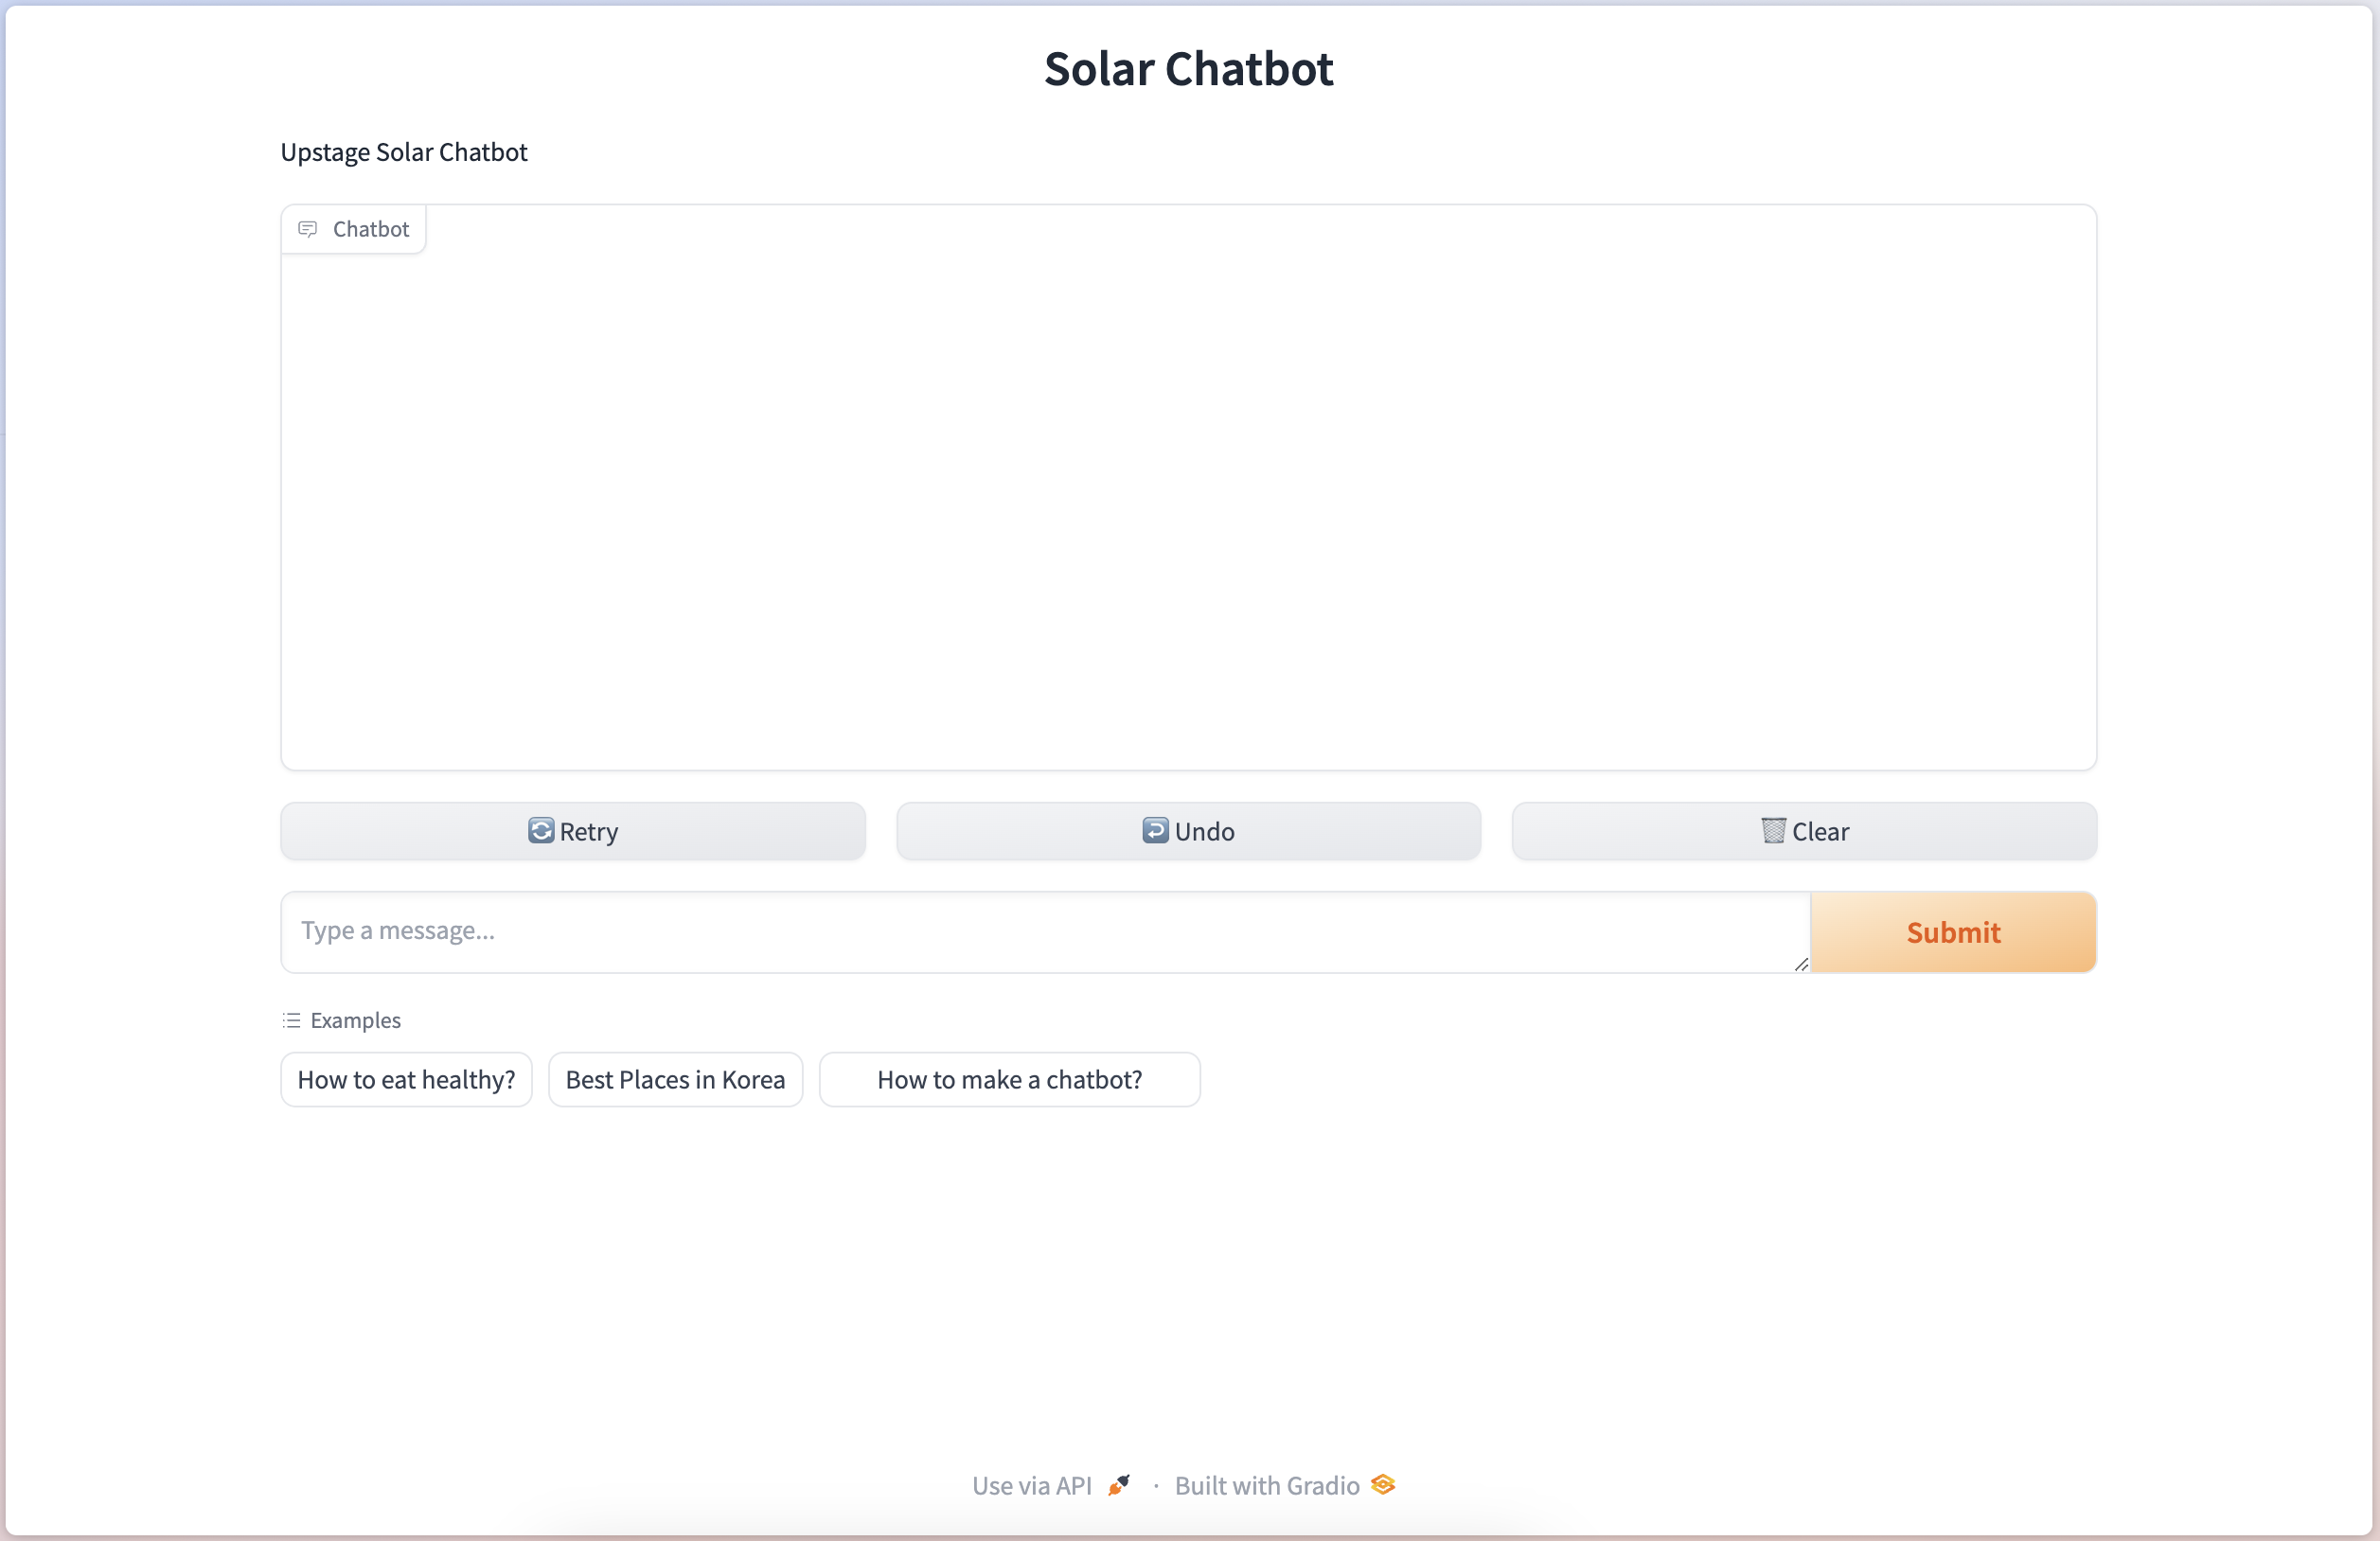